In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [46]:
data=pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [47]:
data.drop('Unnamed: 32',axis=1,inplace=True)

In [48]:
X=data.iloc[:,2:].values
y=data.iloc[:,1].values

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1=LabelEncoder()
y=labelencoder_X_1.fit_transform(y)
y.shape

(569,)

In [50]:
#Splitting the data into test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)

In [51]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [53]:
#Initialize the ANN
model=tf.keras.Sequential()

In [54]:
model.add(Dense(16,input_dim=30,activation='relu'))
#model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#Specify loss function and the optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
16/16 [==============================] - 0s 938us/step - loss: 0.5269 - accuracy: 0.8251
Epoch 2/150
16/16 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8735
Epoch 3/150
16/16 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.9292
Epoch 4/150
16/16 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.9479
Epoch 5/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9608
Epoch 6/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.9623
Epoch 7/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1698 - accuracy: 0.9570
Epoch 8/150
16/16 [==============================] - 0s 896us/step - loss: 0.1512 - accuracy: 0.9623
Epoch 9/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9580
Epoch 10/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9691
Epoch

16/16 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9936
Epoch 83/150
16/16 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9953
Epoch 84/150
16/16 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.9891
Epoch 85/150
16/16 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9933
Epoch 86/150
16/16 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9874
Epoch 87/150
16/16 [==============================] - 0s 926us/step - loss: 0.0258 - accuracy: 0.9952
Epoch 88/150
16/16 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.9932
Epoch 89/150
16/16 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9903
Epoch 90/150
16/16 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9944
Epoch 91/150
16/16 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9882
Epoch 92/15

In [56]:
#Check model performance on data
y_pred=model.predict(X_test)
len(y_pred)

57

In [57]:
predicted_values=np.round(y_pred)

In [58]:
predicted_values.flatten()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0.], dtype=float32)

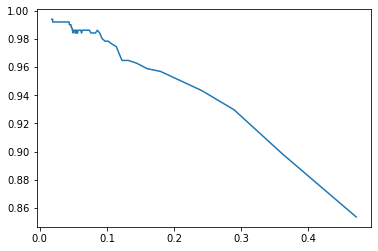

In [64]:
plt.plot(history.history['loss'])

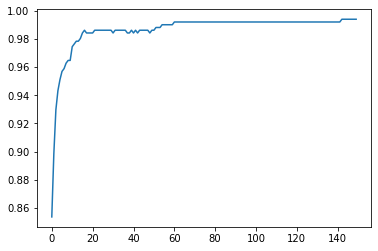

In [65]:
plt.plot(history.history['accuracy'])